# CS109b: Milestone 1

### By: Paul Harris, Mitchell Foster, Luke Morgan-Scott

#### Step 1: Import Libraries and API Code

Code to generate the movie genre pairs and a suitable visualization of the result
Additional visualization sketches and EDA with a focus on movie genres
A list of questions you could answer with this and related data. Get creative here!

In [218]:
#import libraries
import tmdbsimple as tmdb
from imdb import IMDb
import time
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#URL for key
#https://api.themoviedb.org/3/movie/550?api_key=822771ddecfdc59a99893ffeaa1ec9b4
# tmdb.API_KEY = '822771ddecfdc59a99893ffeaa1ec9b4'

**Our favorite movie is the Matrix, so we worked from there.**

First we found the movie poster link.

In [140]:
#Initialize base structure for the posters 

base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

u'http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg'

Then we found the genre for the movie in both databases.

In [161]:
#Get Matrix genre
ia = IMDb()
the_matrix = ia.get_movie('0133093')
print "The Matrix genres in IMDB are:"
the_matrix['genres']

The Matrix genres in IMDB are:


[u'Action', u'Sci-Fi']

In [192]:
#Initialize search for matrix
search = tmdb.Search()
response = search.movie(query='The Matrix')
matrix_genre_id = response["results"][0]["genre_ids"]
genres = tmdb.Genres()
genres = genres.list()
print "The Matrix genres in TMDB are:"
for genre in genres["genres"]:
    if(int(genre["id"]) in matrix_genre_id):
                print genre["name"]

The Matrix genres in TMDB are:
Action
Science Fiction


#### Step 2: Top 10 Movies w/ Genre

In [178]:
discover = tmdb.Discover()
pop = discover.movie(sort_by = "popularity.desc")["results"][0:10]

In [204]:
print "The top 10 movies are:"
for s in pop:
    print(s['title']) #s['id'], s['release_date'], s['popularity'])

The top 10 movies are:
Beauty and the Beast
Logan
Sing
Kong: Skull Island
Ghost in the Shell
Jurassic World
Fantastic Beasts and Where to Find Them
The Boss Baby
Interstellar
Split


In [205]:
print "The genres for top 10 movie (in the TMDB database) are:"
for array in pop:
    print array["title"] + ":"
    for ID in array["genre_ids"]:
        for genre in genres["genres"]:
            #print genre["id"]
            #print number
            #print genre["id"] == number
            if(int(genre["id"]) == ID):
                print genre["name"]
    print ""

The genres for top 10 movie (in the TMDB database) are:
Beauty and the Beast:
Fantasy
Music
Romance

Logan:
Action
Drama
Science Fiction

Sing:
Animation
Comedy
Drama
Family
Music

Kong: Skull Island:
Science Fiction
Action
Adventure
Fantasy

Ghost in the Shell:
Action
Drama
Science Fiction

Jurassic World:
Action
Adventure
Science Fiction
Thriller

Fantastic Beasts and Where to Find Them:
Adventure
Action
Fantasy

The Boss Baby:
Animation
Comedy
Family

Interstellar:
Adventure
Drama
Science Fiction

Split:
Horror
Thriller



In [207]:
id_names = []
for s in pop:
    id_names.append(ia.search_movie(s["title"])[0].movieID) 

In [210]:
print "The genres for top 10 movie (in the TMDB database) are:"
for i in id_names:
    movie_object = ia.get_movie(i)
    print movie_object["title"]
    for g in movie_object["genres"]:
        print g
    print ""

The genres for top 10 movie (in the TMDB database) are:
Beauty and the Beast
Family
Fantasy
Musical
Romance

Logan
Action
Drama
Sci-Fi
Thriller

Sing
Animation
Comedy
Family
Music

Kong: Skull Island
Action
Adventure
Fantasy
Sci-Fi

Ghost in the Shell
Action
Crime
Drama
Mystery
Sci-Fi
Thriller

Jurassic World
Action
Adventure
Sci-Fi

Fantastic Beasts and Where to Find Them
Adventure
Family
Fantasy

The Boss Baby
Animation
Comedy
Family

Interstellar
Adventure
Drama
Sci-Fi

Split
Horror
Thriller



#### Step 3: Potential Genre Prediction Conflicts

We think that there will be two main potential challenges in predicting genres for movies based on the data that we have looked at.

The first challenge will be aggregating all of the data that we have across all sources (IMDB, TMDB, and other potential sources such as Wikipedia, Rotten Tomatos, etc). Getting all of the data in one easy to many type and structure will be incredibly important to easy manipulation, which will involve the standardization of the data.

The second challenge will be adding to the existing data with important and pertinent trends, such as which actors, directors, descriptions, pair well with genre.

#### Step 4: Pairing and Visualizations

In [216]:
Pairing_Array = []

discover = tmdb.Discover()
top = discover.movie(sort_by = "popularity.desc")["results"]
names = []
for s in top:
    names.append(ia.search_movie(s["title"])[0].movieID) 

Raw = dict()
for i in names:
    movie_object = ia.get_movie(i)
    Raw[i] = movie_object["genres"]
    

Action_Adventure = 0
Action_Horror = 0
Action_Drama = 0
Adventure_Scifi = 0
Adventure_Thriller = 0

for i in range(0,len(names)):   
    
    x = len(Raw.values()[i])
    c = Raw.values()[i]
    
    print c
        
    if 'Action' in c and 'Adventure' in c:
        
        Pairing_Array.append(1)
    
    if 'Action' in c and 'Horror' in c:
        
        Pairing_Array.append(2)
        
    if 'Action' in c and 'Drama' in c:
        
        Pairing_Array.append(3)

    if 'Adventure' in c and 'Sci-Fi' in c:
        
        Pairing_Array.append(4)
            
    if 'Adventure' in c and 'Thriller' in c:
        
        Pairing_Array.append(5)


Pairing_Viz = [Action_Drama, Action_Adventure, Action_Horror, Adventure_Scifi, Adventure_Thriller]
        
print Pairing_Viz

[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']
[u'Animation', u'Comedy', u'Family', u'Music']
[u'Action', u'Adventure', u'Sci-Fi']
[u'Animation', u'Comedy', u'Family']
[u'Adventure', u'Family', u'Fantasy']
[u'Horror', u'Sci-Fi', u'Thriller']
[u'Action', u'Adventure', u'Sci-Fi']
[u'Adventure', u'Drama', u'Sci-Fi']
[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']
[u'Horror', u'Thriller']
[u'Animation', u'Adventure', u'Comedy', u'Family']
[u'Drama', u'Mystery', u'Sci-Fi', u'Thriller']
[u'Action', u'Adventure', u'Sci-Fi']
[u'Action', u'Adventure', u'Sci-Fi', u'Thriller']
[u'Action', u'Crime', u'Drama', u'Mystery', u'Sci-Fi', u'Thriller']
[u'Action', u'Crime', u'Thriller']
[u'Family', u'Fantasy', u'Musical', u'Romance']
[u'Action', u'Adventure', u'Comedy', u'Romance', u'Sci-Fi']
[u'Action', u'Drama', u'Sci-Fi', u'Thriller']
[u'Action', u'Adventure', u'Sci-Fi']
[0, 0, 0, 0, 0]


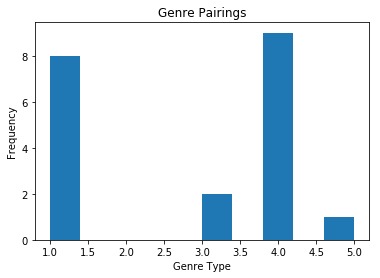

In [219]:
plt.hist(Pairing_Array)
plt.title("Genre Pairings")
plt.xlabel("Genre Type")
plt.ylabel("Frequency")

plt.show()

#### Step 5: Visualizations

#### Step 6: Questions